<a href="https://colab.research.google.com/github/NihanKarpuzoglu/DataScience_bp_dataset_research/blob/main/WF_detection_with_GoogLeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files

# choose the kaggle.json file that you downloaded
files.upload()
! mkdir ~/.kaggle

# make a directory named kaggle and copy the kaggle.json file there
! cp kaggle.json ~/.kaggle/

# change the permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

# download the dataset for a specific competition
#! kaggle competitions download -c 'name-of-competition'
! kaggle datasets list

Saving kaggle.json to kaggle.json
Saving archive.zip to archive.zip
ref                                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                 5MB  2022-11-13 15:47:17          13314        378  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india    Credit Card Spending Habits in India           319KB  2022-12-14 07:30:37            807         33  1.0              
michals22/coffee-dataset                                        Coffee dataset                                  24KB  2022-12-15 20:02:12           2935         72  1.0              
thedevastator/unl

In [2]:
! kaggle datasets download brsdincer/wildfire-detection-image-data

 68% 17.0M/24.9M [00:00<00:00, 58.1MB/s]
100% 24.9M/24.9M [00:00<00:00, 67.5MB/s]


In [3]:
! mkdir fireds

In [4]:
! unzip wildfire-detection-image-data.zip -d fireds

Archive:  wildfire-detection-image-data.zip
  inflating: fireds/forest_fire/Testing/fire/abc169.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc170.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc171.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc172.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc173.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc174.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc175.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc176.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc177.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc178.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc179.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc180.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc181.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc182.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc183.jpg  
  inflating: fireds/forest_fire/Testing/fire/abc184.jpg  
  inflating: fireds/forest_f

In [5]:
import os
import cv2
from PIL import Image
import numpy as np

In [6]:
train_path = '/content/fireds/forest_fire/Training and Validation/' 
test_path = '/content/fireds/forest_fire/Testing/'

In [7]:
print('The training set consists of ', len(os.listdir(train_path + '/fire/')),
      ' fire images and ', len(os.listdir(train_path + '/nofire/')), ' no fire images.' )

The training set consists of  928  fire images and  904  no fire images.


In [8]:
datas = ['fire', 'nofire']

def load_images_and_labels(data_path, datas): 
  X = []
  y = []
  i = 0
  for index, data in enumerate(datas): 
    #print(data_path + data + '/');
    for img_name in os.listdir(data_path + data + '/'):
      i = i +1
      print(i)
      img = cv2.imread(data_path + data + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((224,224))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(index)
  return X, y

In [9]:
X_train, y_train = load_images_and_labels(train_path, datas)
X_test, y_test = load_images_and_labels(test_path, datas)


data_dict = {'X_train' : X_train, #train/fire
             'y_train': y_train, #train/nofire
             'X_test': X_test, #test fire
             'y_test': y_test} #test nofire
np.save('data_dict.npy', data_dict)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


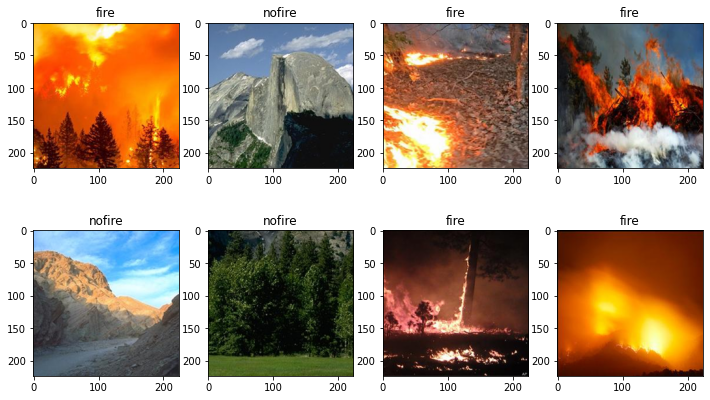

In [10]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize = (12,7))
datas = ['fire', 'nofire']
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(datas[y_train[ind]])

In [11]:
from keras.layers import Concatenate, Add
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import SGD
from keras.metrics import binary_crossentropy
import copy

In [12]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  concatenation_layer = Concatenate(axis=-1)
  output_layer = concatenation_layer([path1, path2, path3, path4])

  return output_layer
  

In [13]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(2, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(2, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(2, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')
  opt = SGD(lr = 0.1)
  model.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])

  return model

In [14]:
from keras.utils import to_categorical

def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0

  # one-hot encoding the labels 
  y = to_categorical(np.array(y))
  return X, y


(X_train, y_train) = preprocess_data(X_train, y_train)
print(y_train.shape)
print(X_train.shape)
(X_test, y_test) = preprocess_data(X_test, y_test)


(1832, 2)
(1832, 224, 224, 3)


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  #datagen = ImageDataGenerator(rotation_range = 5, width_shift_range = 0.1, 
  #                             height_shift_range = 0.1, horizontal_flip = True)
  # iteration on the training set
  #it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  # path to save the checkpoint 
  #path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  #checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = True, 
  #                              mode = 'auto')
  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, steps_per_epoch = steps, 
                                validation_data = (X_test, y_test), verbose = 1)
  # Evaluating the model
  
  
  return history


In [16]:
def get_accuracy(model):
    _, acc, *remaining = model.evaluate(X_test, y_test, verbose = 1)
    print('%.3f' % (acc * 100.0))
    return acc

In [17]:
GoogLeNet_model = GoogLeNet()
GoogLeNet_model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 109, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 54, 54, 64)   0           ['conv2d[0][0]']                 
                                                                                          

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


                                                                                                  
 concatenate_5 (Concatenate)    (None, 12, 12, 528)  0           ['conv2d_34[0][0]',              
                                                                  'conv2d_36[0][0]',              
                                                                  'conv2d_38[0][0]',              
                                                                  'conv2d_39[0][0]']              
                                                                                                  
 conv2d_42 (Conv2D)             (None, 12, 12, 160)  84640       ['concatenate_5[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 32)   16928       ['concatenate_5[0][0]']          
                                                                                                  
 max_pooli

In [18]:
train_history = train_model(GoogLeNet_model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128)

Epoch 1/50
14/14 [==============================] - 378s 27s/step - loss: 2.0661 - dense_4_loss: 0.6920 - dense_1_loss: 0.6846 - dense_3_loss: 0.6895 - dense_4_accuracy: 0.5675 - dense_1_accuracy: 0.7171 - dense_3_accuracy: 0.6373 - val_loss: 2.0370 - val_dense_4_loss: 0.6899 - val_dense_1_loss: 0.6661 - val_dense_3_loss: 0.6810 - val_dense_4_accuracy: 0.8382 - val_dense_1_accuracy: 0.8824 - val_dense_3_accuracy: 0.9118
Epoch 2/50
14/14 [==============================] - 349s 26s/step - loss: 2.0108 - dense_4_loss: 0.6867 - dense_1_loss: 0.6498 - dense_3_loss: 0.6743 - dense_4_accuracy: 0.6479 - dense_1_accuracy: 0.6901 - dense_3_accuracy: 0.6620 - val_loss: 1.8380 - val_dense_4_loss: 0.6669 - val_dense_1_loss: 0.5572 - val_dense_3_loss: 0.6139 - val_dense_4_accuracy: 0.8529 - val_dense_1_accuracy: 0.8824 - val_dense_3_accuracy: 0.8676
Epoch 3/50
14/14 [==============================] - 355s 25s/step - loss: 2.0490 - dense_4_loss: 0.6837 - dense_1_loss: 0.6588 - dense_3_loss: 0.7065 - 

In [19]:
acc = get_accuracy(GoogLeNet_model)

3/3 [==============================] - 3s 819ms/step - loss: 0.7138 - dense_4_loss: 0.2499 - dense_1_loss: 0.2226 - dense_3_loss: 0.2413 - dense_4_accuracy: 0.8971 - dense_1_accuracy: 0.9412 - dense_3_accuracy: 0.9118
24.993


In [20]:
GoogLeNet_model.save("GoogLeNetForWF_Model")